### Import Necessary Modules


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
url="https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv"
Gapminder_raw_data = pd.read_csv(url)
df = Gapminder_raw_data.copy()
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df = df.drop(['Region'],axis=1)
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [8]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
dtype: int64

<AxesSubplot:>

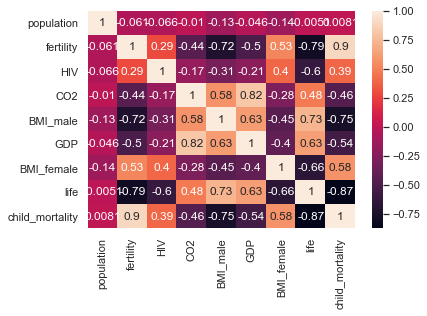

In [9]:
sns.heatmap(df.corr(), annot=  True)

### from the graph we see that Life is most positive correlated with BMI_male, GDP and negative correlated with fertility

In [10]:
df.columns.values

array(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'], dtype=object)

In [26]:
y = df[['life']]
X = df[['fertility']]

In [27]:
y.shape, X.shape

((139, 1), (139, 1))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fertility', ylabel='life'>

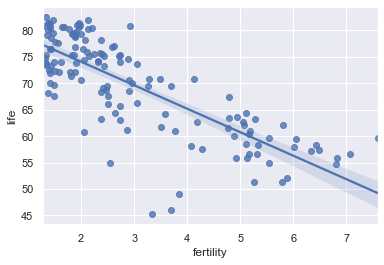

In [29]:
sns.regplot(X, y)

### Preprocessing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)
scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***Linear Regression***

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression(normalize= True)

In [42]:
reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [43]:
y_pred= reg.predict(X_test)

In [45]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:',  metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.7671328016569254
Mean Squared Error: 21.447220027657824
Root Mean Squared Error: 4.631114339730539
R2 Square: 0.7185933180565793


In [49]:
# Print the intercept 
print("The model intercept is: {}".format(reg.intercept_))
# Print the coef 
print("The model parameter is: {}".format(reg.coef_))
# Print the Godness-of-fit metric 
print("The coefficient of determination is: {}".format(reg.score(X_test, y_test)))

The model intercept is: [69.33423423]
The model parameter is: [[-7.06284134]]
The coefficient of determination is: 0.7185933180565793


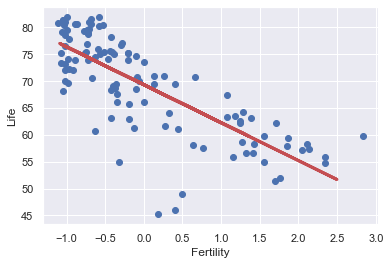

In [60]:
plt.scatter(X_train, y_train)
fig = plt.plot(X_test, y_pred, lw= 3, c= 'r')
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.show()